## 피해자 연령대별 입금 데이터 (은행, 증권사, 핀테크)

In [1]:
# 금융사별(1금융권, 증권사, 핀테크) 엑셀 파일 합치기

In [2]:
import pandas as pd
import os

def merge_excel_files(file_path, save_path, columns=None):
    file_format = '.csv'
    merge_df = pd.DataFrame()
    file_list = [f"{file_path}/{file}" for file in os.listdir(file_path) if file_format in file]
    
    for file in file_list:
        file_df = pd.read_csv(file, encoding='utf-8', header=None)
        merge_df = pd.concat([merge_df, file_df])
    
    merge_df.to_csv(save_path, index=False)
    

In [3]:
# 1금융권
merge_excel_files(file_path = '/Users/student/Final_project/data/bank',
                  save_path = '/Users/student/Final_project/data/merge/old_bank.csv')

In [4]:
# 핀테크
merge_excel_files(file_path = '/Users/student/Final_project/data/fintech',
                  save_path = '/Users/student/Final_project/data/merge/old_fintech.csv')

In [5]:
# 증권사
merge_excel_files(file_path = '/Users/student/Final_project/data/stock',
                  save_path = '/Users/student/Final_project/data/merge/old_stock.csv')

In [6]:
df_bank = pd.read_csv('/Users/student/Final_project/data/merge/old_bank.csv', encoding = 'UTF-8')
df_fintech = pd.read_csv('/Users/student/Final_project/data/merge/old_fintech.csv', encoding = 'UTF-8')
df_stock = pd.read_csv('/Users/student/Final_project/data/merge/old_stock.csv', encoding = 'UTF-8')

In [7]:
df_bank.columns = ['no','old','code','date']
df_stock.columns = ['no','old','code','date']

In [8]:
# 금융회사 코드 매핑

In [9]:
code = {
    "2": "KDB산업은행",
    "3": "IBK기업은행",
    "4": "KB국민은행",
    "7": "수협은행",
    "11": "NH농협은행",
    "12": "농협중앙회(단위농축협)",
    "20": "우리은행",
    "23": "SC제일은행",
    "27": "한국씨티은행",
    "31": "대구은행",
    "32": "부산은행",
    "34": "광주은행",
    "35": "제주은행",
    "37": "전북은행",
    "39": "경남은행",
    "45": "새마을금고중앙회",
    "48": "신협중앙회",
    "50": "저축은행중앙회",
    "64": "산림조합중앙회",
    "71": "우체국",
    "81": "하나은행",
    "88": "신한은행",
    "89": "케이뱅크",
    "90": "카카오뱅크",
    "92": "토스뱅크",
    "218": "KB증권",
    "238": "미래에셋대우",
    "240": "삼성증권",
    "243": "한국투자증권",
    "247": "NH투자증권",
    "261": "교보증권",
    "262": "하이투자증권",
    "263": "현대차증권",
    "264": "키움증권",
    "265": "이베스트투자증권",
    "266": "SK증권",
    "267": "대신증권",
    "269": "한화투자증권",
    "278": "신한금융투자",
    "279": "DB금융투자",
    "280": "유진투자증권",
    "287": "메리츠증권"
}

In [10]:
df_code = pd.DataFrame(list(code.items()),columns=['code','bank_name'] )

In [11]:
df_bank['code'] = df_bank['code'].astype(str)

In [12]:
df_merge_bank = pd.merge(df_bank, df_code, on='code',how='left')

In [13]:
df_code['bank_name'].unique()

array(['KDB산업은행', 'IBK기업은행', 'KB국민은행', '수협은행', 'NH농협은행', '농협중앙회(단위농축협)',
       '우리은행', 'SC제일은행', '한국씨티은행', '대구은행', '부산은행', '광주은행', '제주은행', '전북은행',
       '경남은행', '새마을금고중앙회', '신협중앙회', '저축은행중앙회', '산림조합중앙회', '우체국', '하나은행',
       '신한은행', '케이뱅크', '카카오뱅크', '토스뱅크', 'KB증권', '미래에셋대우', '삼성증권',
       '한국투자증권', 'NH투자증권', '교보증권', '하이투자증권', '현대차증권', '키움증권', '이베스트투자증권',
       'SK증권', '대신증권', '한화투자증권', '신한금융투자', 'DB금융투자', '유진투자증권', '메리츠증권'],
      dtype=object)

In [14]:
df_stock['code'] = df_stock['code'].astype(str)

In [15]:
df_merge_stock = pd.merge(df_stock, df_code, on='code',how='left')

In [16]:
name_null = df_merge_stock[df_merge_stock['bank_name'].isnull()]

In [17]:
name_null['code'].unique()

array(['226', '230', '288', '209', '224', '225', '270', '295', '294',
       '271', '292', '227', '291', '293'], dtype=object)

In [18]:
# bank_name 결측치 '기타'로 대체 (없어진 금융기관 코드?)

In [19]:
df_merge_stock = df_merge_stock.fillna('기타')

In [20]:
# df_merge_stock.isnull().sum()

In [21]:
df_fintech.columns = ['no','old','bank_name','date']

In [22]:
# df_fintech['bank_name'].unique()

In [23]:
df_fintech['type'] = '핀테크'
# df_fintech

In [24]:
df_merge_bank['type'] = '은행'
# df_merge_bank

In [25]:
df_merge_stock['type'] = '증권사'
# df_merge_stock

In [26]:
df = pd.concat([df_merge_bank, df_merge_stock, df_fintech], axis = 0, ignore_index=True)

In [27]:
# df.isnull().sum()

In [28]:
df = df.fillna('0')

In [29]:
# df.isnull().sum()

In [30]:
# df

In [31]:
# df.dtypes

In [32]:
# df['old'].unique()

In [33]:
# data 분석을 위한 칼럼 신규 추가
# 연령대
old_n = []

for idx in df['old']:
    if idx == '1970-1980':
        old_n.append('50대')
    elif idx == '1980-1990':
        old_n.append('40대')
    elif idx == '1990-2000':
        old_n.append('30대')
    elif idx == '1960-1970':
        old_n.append('60대')
    elif idx == '2000-2010':
        old_n.append('20대')
    elif idx == '1950-1960':
        old_n.append('70대')
    elif idx == '2010-2020':
        old_n.append('10대')
    elif idx == '1940-1950':
        old_n.append('80대')
    else:
        old_n.append('기타')
df['old_n'] = old_n

In [34]:
# df

In [35]:
del df['old']
del df['code']

In [36]:
import platform

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
import seaborn as sns
sns.set(style="darkgrid")

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline

In [37]:
df_type_count = df['type'].value_counts()

Text(0.5, 1.0, '\n 금융회사유형별 사기이용계좌 입금 비율(건수) \n')

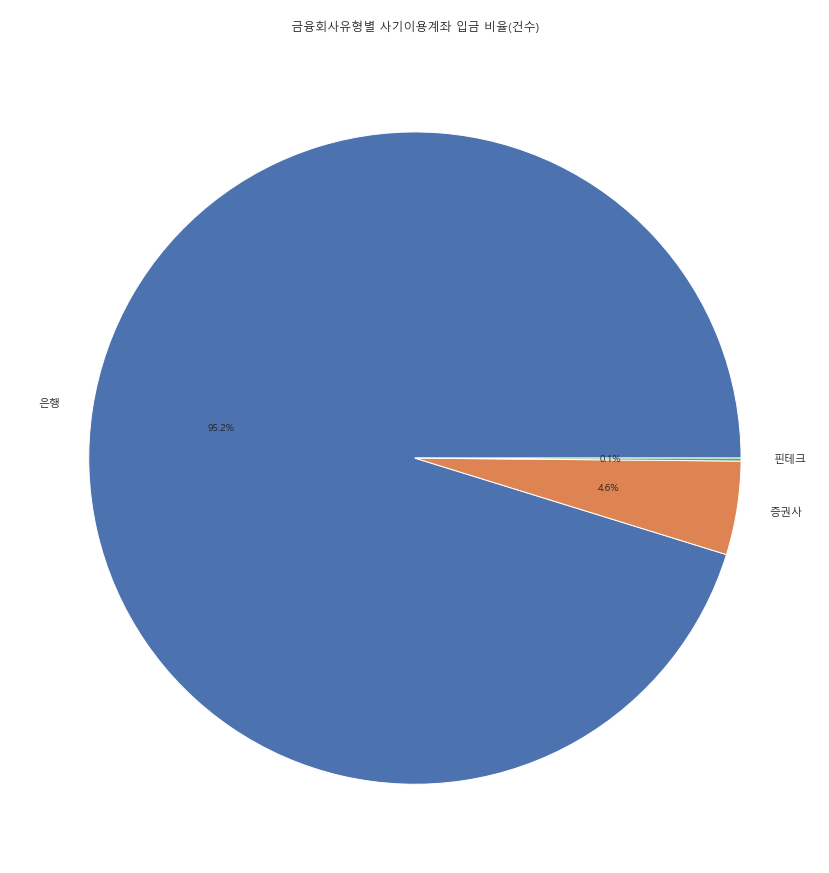

In [38]:
plt.rcParams["figure.figsize"] = [15,15]
plt.pie(df_type_count, labels = df_type_count.index, autopct = '%.1f%%')
plt.title('\n 금융회사유형별 사기이용계좌 입금 비율(건수) \n')

Text(0.5, 1.0, '\n 금융사별 사기이용계좌 입금 비율(건수) \n')

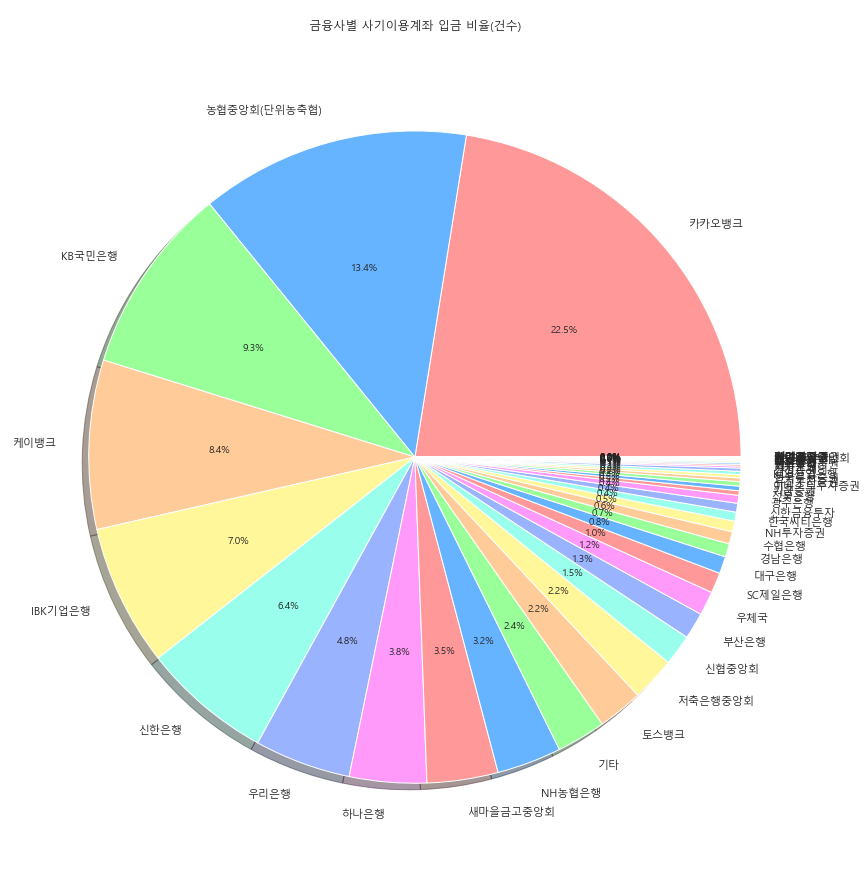

In [39]:
df_bank_count = df['bank_name'].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fff799','#99ffec','#99b3ff','#ff99fa']

plt.rcParams["figure.figsize"] = [15,15]
plt.pie(df_bank_count, labels = df_bank_count.index, autopct = '%.1f%%',shadow=True,colors=colors)
plt.title('\n 금융사별 사기이용계좌 입금 비율(건수) \n')

### 농협이 대포통장이 많은 것은 전국 각 지역에 소재해 있어 접근성이 용이하고 내부통제가 취약한 일부 점포와 농·어촌 지역 소재 단위조합 등을 주된 대포통장 개설경로로 활용하기 때문이다.
### 카카오뱅크 -> 비대면 계좌 계설 가능 / 대포통장 명의인이 많은 젊은 세대 (20-30대)에서 많이 이용하기 때문

In [40]:
# 연령대별 사기이용계좌 입금건수

Text(0.5, 1.0, '\n 연령대별 사기이용계좌 입금 피해 비율(건수) \n')

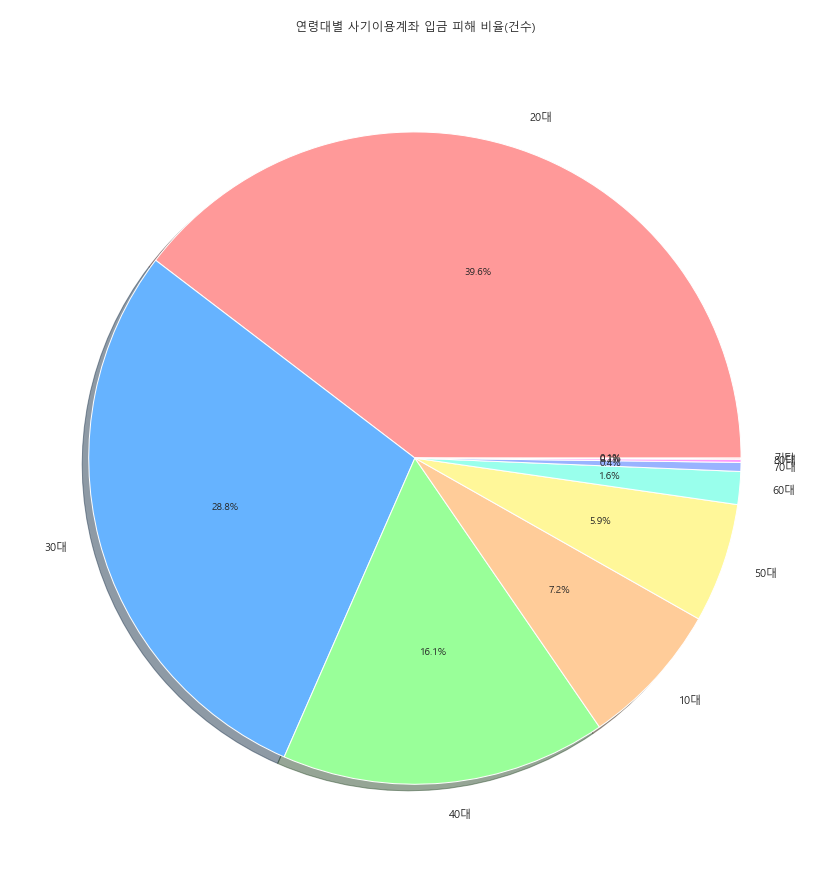

In [41]:
df_old_count = df['old_n'].value_counts()
plt.rcParams["figure.figsize"] = [15,15]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fff799','#99ffec','#99b3ff','#ff99fa']
plt.pie(df_old_count, labels = df_old_count.index, autopct = '%.1f%%',shadow=True, colors=colors)
plt.title('\n 연령대별 사기이용계좌 입금 피해 비율(건수) \n')

In [42]:
# date 년월일 형식으로 변경

In [43]:
df['date'] = df['date'].str[:8]

In [44]:
df['date'] = pd.to_datetime(df['date'])

In [45]:
# df.head()

In [46]:
# 금융회사 종류, 연령별 비중

In [47]:
df_type_bank = df[df['type']=='은행']
# df_type_bank

In [48]:
df_old_bank = df_type_bank['old_n'].value_counts()
# df_old_bank

Text(0.5, 1.0, '\n 은행 - 연령대별 사기이용계좌 입금 피해 비율(건수) \n')

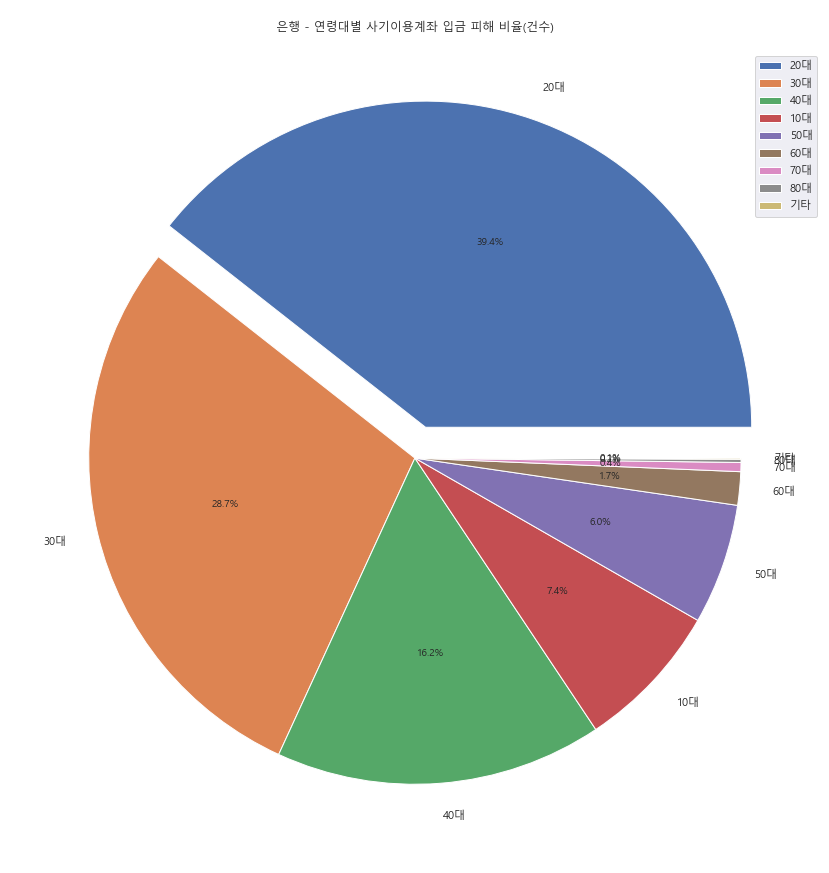

In [49]:
plt.rcParams["figure.figsize"] = [15,15]
explode = [0.1,0,0,0,0,0,0,0,0]
# plt.pie(df_old_bank, explode=explode, labels = df_old_bank.index, autopct = '%.1f%%')
plt.pie(df_old_bank, labels = df_old_bank.index, autopct = '%.1f%%', explode=explode)
plt.legend(df_old_bank.index[:], loc=1)
plt.title('\n 은행 - 연령대별 사기이용계좌 입금 피해 비율(건수) \n')

In [50]:
df_type_stock = df[df['type']=='증권사']
df_old_stock = df_type_stock['old_n'].value_counts()
# df_old_stock

Text(0.5, 1.0, '\n 증권사 - 연령대별 사기이용계좌 입금 피해 비율(건수) \n')

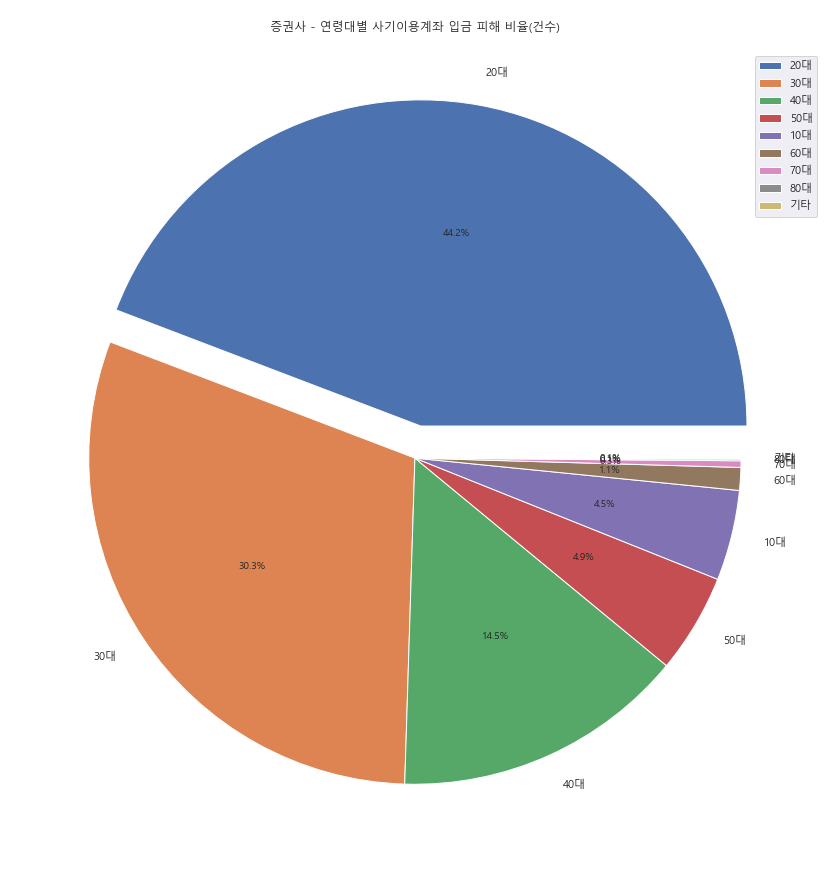

In [51]:
plt.rcParams["figure.figsize"] = [15,15]
explode = [0.1,0,0,0,0,0,0,0,0]
# plt.pie(df_old_bank, explode=explode, labels = df_old_bank.index, autopct = '%.1f%%')
plt.pie(df_old_stock, labels = df_old_stock.index, autopct = '%.1f%%', explode=explode)
plt.legend(df_old_stock.index[:], loc=1)
plt.title('\n 증권사 - 연령대별 사기이용계좌 입금 피해 비율(건수) \n')

Text(0.5, 1.0, '\n 핀테크- 연령대별 사기이용계좌 입금 피해 비율(건수 \n')

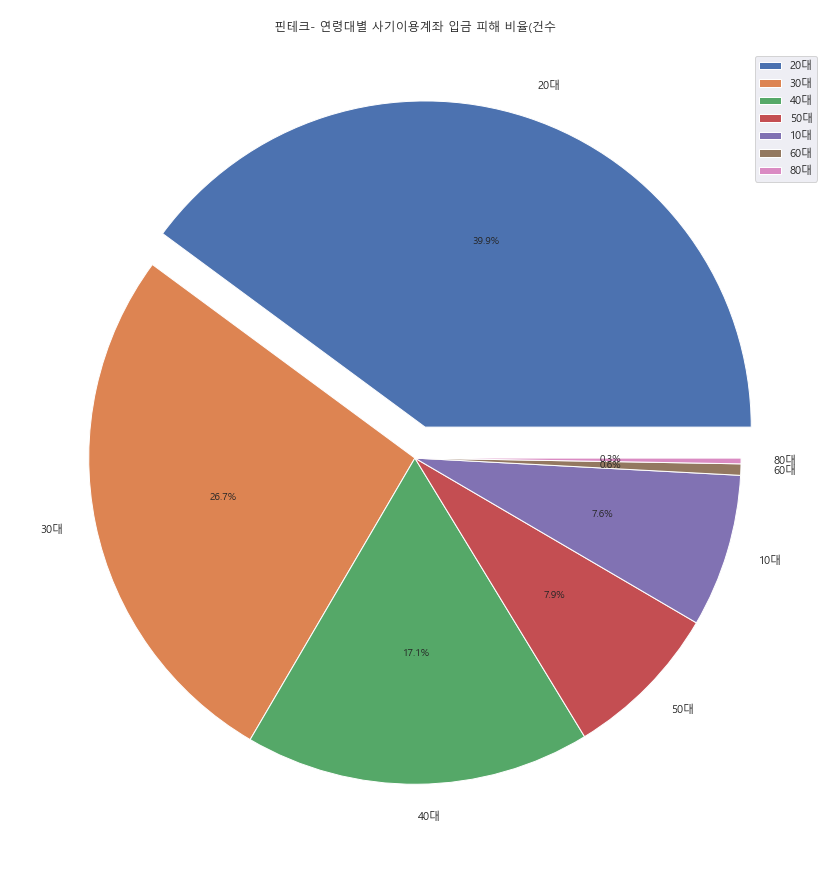

In [52]:
df_type_fintech = df[df['type']=='핀테크']
df_old_fintech = df_type_fintech['old_n'].value_counts()
df_old_fintech
plt.rcParams["figure.figsize"] = [15,15]
explode = [0.1,0,0,0,0,0,0]
# plt.pie(df_old_bank, explode=explode, labels = df_old_bank.index, autopct = '%.1f%%')
plt.pie(df_old_fintech, labels = df_old_fintech.index, autopct = '%.1f%%',explode=explode)
plt.legend(df_old_fintech.index[:], loc=1)
plt.title('\n 핀테크- 연령대별 사기이용계좌 입금 피해 비율(건수 \n')

### 금융사별 세부 분석

In [53]:
# 월단위 금융사별 증감 분석

In [54]:
df_date=df.set_index('date')

In [55]:
df_date['month']=df_date.index.month
df_date['year']=df_date.index.year
df_date

,no,bank_name,type,old_n,month,year
date,,,,,,
2021-02-05,20212,신한은행,은행,50대,2,2021
2021-02-05,20213,신한은행,은행,50대,2,2021
2021-02-02,20214,NH농협은행,은행,40대,2,2021
2021-02-15,20215,신한은행,은행,40대,2,2021
2021-02-22,20216,신한은행,은행,40대,2,2021
...,...,...,...,...,...,...
2022-05-25,969,토스,핀테크,30대,5,2022
2022-05-27,970,카카오페이,핀테크,20대,5,2022
2022-05-30,971,카카오페이,핀테크,20대,5,2022


In [56]:
df_date = df_date.reset_index()

In [57]:
df_date['ym'] = df_date['date']

In [58]:
df_date['ym']=df_date['date'].dt.to_period(freq='M')
df_date

,date,no,bank_name,type,old_n,month,year,ym
0,2021-02-05,20212,신한은행,은행,50대,2,2021,2021-02
1,2021-02-05,20213,신한은행,은행,50대,2,2021,2021-02
2,2021-02-02,20214,NH농협은행,은행,40대,2,2021,2021-02
3,2021-02-15,20215,신한은행,은행,40대,2,2021,2021-02
4,2021-02-22,20216,신한은행,은행,40대,2,2021,2021-02
...,...,...,...,...,...,...,...,...
245273,2022-05-25,969,토스,핀테크,30대,5,2022,2022-05
245274,2022-05-27,970,카카오페이,핀테크,20대,5,2022,2022-05
245275,2022-05-30,971,카카오페이,핀테크,20대,5,2022,2022-05
245276,2022-05-30,972,카카오페이,핀테크,20대,5,2022,2022-05


In [59]:
df_date_ym = df_date[['type','ym']]
# df_date_ym

In [60]:
df_date_ym['ym'] = df_date_ym['ym'].astype(str)

C:\Users\student\AppData\Local\Temp\ipykernel_1116\476216562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_ym['ym'] = df_date_ym['ym'].astype(str)


In [61]:
df_m_type = df_date_ym.groupby(['ym','type']).value_counts().unstack(1)
df_m_type = df_m_type.fillna(0)
df_m_type

type,은행,증권사,핀테크
ym,,,
2021-02,15528.0,672.0,0.0
2021-03,16577.0,675.0,0.0
2021-04,15204.0,888.0,0.0
2021-05,14996.0,1102.0,0.0
2021-06,13339.0,1014.0,0.0
2021-07,14495.0,960.0,0.0
2021-08,15029.0,729.0,0.0
2021-09,14067.0,567.0,0.0
2021-10,14871.0,579.0,0.0


In [62]:
list(df_m_type.index)

['2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12',
 '2022-01',
 '2022-02',
 '2022-03',
 '2022-04',
 '2022-05']

In [63]:
list(df_m_type['증권사'])

[672.0,
 675.0,
 888.0,
 1102.0,
 1014.0,
 960.0,
 729.0,
 567.0,
 579.0,
 100.0,
 576.0,
 727.0,
 747.0,
 771.0,
 504.0,
 759.0]

In [64]:
# # 월별
# X  = list(df_m_type.index)

# Y1 = list(df_m_type['은행'])
# Y2 = list(df_m_type['증권사'])
# Y3 = list(df_m_type['핀테크'])

In [65]:
# 짝수월
X = ['2021-02',
 '2021-04',
 '2021-06',
 '2021-08',
 '2021-10',
 '2021-12',
 '2022-02',
 '2022-04']
Y1 = [15528.0,15204.0,13339.0,15029.0,14871.0,14310.0,17378.0,15466.0]
Y2 = [672.0,888.0,1014.0,729.0,579.0, 576.0, 747.0, 504.0]
Y3 = [0.0, 0.0, 0.0, 0.0, 0.0, 52.0, 37.0, 73.0]

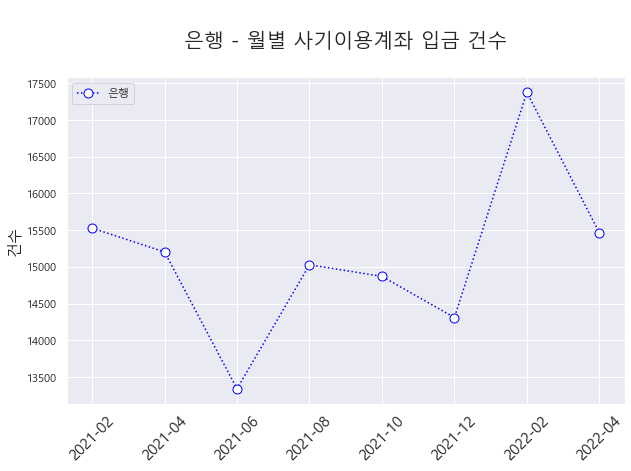

In [66]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(X, Y1, color = 'blue', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '은행')

# plt.xlabel('월', fontsize = 15, )
plt.ylabel('건수', fontsize = 15)
plt.title('\n 은행 - 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 2)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()

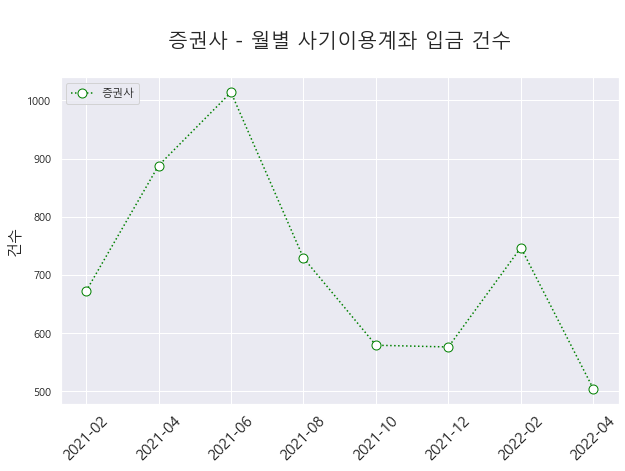

In [67]:
plt.rcParams['figure.figsize'] = (10,6)

plt.plot(X, Y2, color = 'green', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '증권사')

# plt.xlabel('월', fontsize = 15)
plt.ylabel('건수', fontsize = 15)
plt.title('\n 증권사 - 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 2)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()

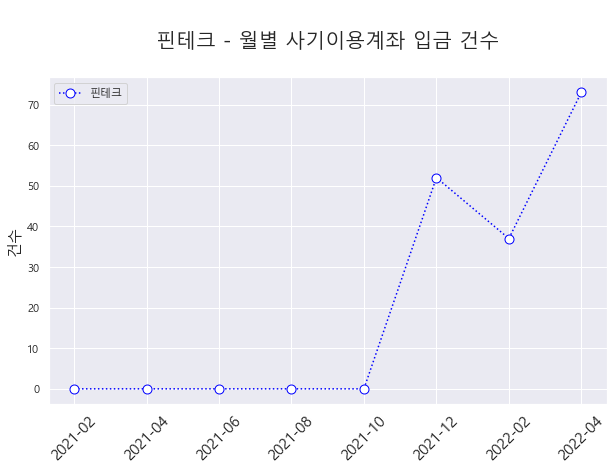

In [68]:
plt.rcParams['figure.figsize'] = (10,6)

plt.plot(X, Y3, color = 'blue', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '핀테크')
# plt.xlabel('월', fontsize = 15)
plt.ylabel('건수', fontsize = 15)
plt.title('\n 핀테크 - 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 2)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()

In [69]:
df_bank_count

카카오뱅크           55124
농협중앙회(단위농축협)    32796
KB국민은행          22932
케이뱅크            20539
IBK기업은행         17177
신한은행            15760
우리은행            11703
하나은행             9366
새마을금고중앙회         8636
NH농협은행           7846
기타               5970
토스뱅크             5486
저축은행중앙회          5380
신협중앙회            3731
부산은행             3225
우체국              2909
SC제일은행           2485
대구은행             2081
경남은행             1620
수협은행             1488
NH투자증권           1306
한국씨티은행           1092
신한금융투자           1069
광주은행              963
전북은행              556
키움증권              553
이베스트투자증권          539
유진투자증권            441
한국투자증권            408
KDB산업은행           394
삼성증권              383
카카오페이             234
제주은행              206
한화투자증권            190
대신증권              177
교보증권              139
토스                104
DB금융투자             98
SK증권               62
산림조합중앙회            57
하이투자증권             23
네이버페이              13
현대차증권              11
페이코                 5
메리츠증권               1
Name: bank

In [70]:
# 월별 금융사 세부 분석

In [71]:
df_date_ym_s = df_date[['bank_name','ym']]
df_date_ym_s

,bank_name,ym
0,신한은행,2021-02
1,신한은행,2021-02
2,NH농협은행,2021-02
3,신한은행,2021-02
4,신한은행,2021-02
...,...,...
245273,토스,2022-05
245274,카카오페이,2022-05
245275,카카오페이,2022-05
245276,카카오페이,2022-05


In [72]:
df_date_ym_s['ym'] = df_date_ym_s['ym'].astype(str)

C:\Users\student\AppData\Local\Temp\ipykernel_1116\564144675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_ym_s['ym'] = df_date_ym_s['ym'].astype(str)


In [73]:
df_m_bank_name = df_date_ym_s.groupby(['ym','bank_name']).value_counts().unstack(1)
df_m_bank_name = df_m_bank_name.fillna(0)
df_m_bank_name

bank_name,DB금융투자,IBK기업은행,KB국민은행,KDB산업은행,NH농협은행,NH투자증권,SC제일은행,SK증권,경남은행,광주은행,...,키움증권,토스,토스뱅크,페이코,하나은행,하이투자증권,한국씨티은행,한국투자증권,한화투자증권,현대차증권
ym,,,,,,,,,,,,,,,,,,,,,
2021-02,4.0,1171.0,1640.0,34.0,603.0,38.0,142.0,12.0,108.0,38.0,...,43.0,0.0,0.0,0.0,653.0,4.0,21.0,33.0,14.0,0.0
2021-03,7.0,1060.0,1767.0,10.0,692.0,93.0,138.0,12.0,149.0,43.0,...,14.0,0.0,0.0,0.0,709.0,0.0,25.0,28.0,4.0,0.0
2021-04,8.0,1200.0,1597.0,30.0,433.0,173.0,125.0,6.0,101.0,31.0,...,49.0,0.0,0.0,0.0,645.0,5.0,18.0,14.0,2.0,0.0
2021-05,1.0,1208.0,1714.0,20.0,413.0,254.0,139.0,2.0,76.0,34.0,...,52.0,0.0,0.0,0.0,681.0,2.0,25.0,49.0,2.0,0.0
2021-06,8.0,1041.0,1294.0,25.0,470.0,182.0,117.0,0.0,90.0,60.0,...,18.0,0.0,0.0,0.0,525.0,1.0,81.0,59.0,17.0,0.0
2021-07,12.0,1151.0,1317.0,17.0,628.0,174.0,187.0,4.0,80.0,90.0,...,35.0,0.0,0.0,0.0,710.0,4.0,107.0,21.0,18.0,0.0
2021-08,18.0,927.0,1344.0,33.0,540.0,82.0,195.0,0.0,87.0,91.0,...,60.0,0.0,0.0,0.0,635.0,0.0,114.0,14.0,17.0,2.0
2021-09,8.0,897.0,1339.0,37.0,451.0,77.0,97.0,0.0,133.0,52.0,...,22.0,0.0,0.0,0.0,527.0,0.0,84.0,10.0,3.0,0.0
2021-10,20.0,846.0,1456.0,33.0,493.0,22.0,143.0,0.0,164.0,58.0,...,44.0,0.0,189.0,0.0,645.0,0.0,60.0,15.0,3.0,0.0


In [74]:
df_m_bank_name_2 = df_m_bank_name.iloc[0::2,:]
df_m_bank_name_2

bank_name,DB금융투자,IBK기업은행,KB국민은행,KDB산업은행,NH농협은행,NH투자증권,SC제일은행,SK증권,경남은행,광주은행,...,키움증권,토스,토스뱅크,페이코,하나은행,하이투자증권,한국씨티은행,한국투자증권,한화투자증권,현대차증권
ym,,,,,,,,,,,,,,,,,,,,,
2021-02,4.0,1171.0,1640.0,34.0,603.0,38.0,142.0,12.0,108.0,38.0,...,43.0,0.0,0.0,0.0,653.0,4.0,21.0,33.0,14.0,0.0
2021-04,8.0,1200.0,1597.0,30.0,433.0,173.0,125.0,6.0,101.0,31.0,...,49.0,0.0,0.0,0.0,645.0,5.0,18.0,14.0,2.0,0.0
2021-06,8.0,1041.0,1294.0,25.0,470.0,182.0,117.0,0.0,90.0,60.0,...,18.0,0.0,0.0,0.0,525.0,1.0,81.0,59.0,17.0,0.0
2021-08,18.0,927.0,1344.0,33.0,540.0,82.0,195.0,0.0,87.0,91.0,...,60.0,0.0,0.0,0.0,635.0,0.0,114.0,14.0,17.0,2.0
2021-10,20.0,846.0,1456.0,33.0,493.0,22.0,143.0,0.0,164.0,58.0,...,44.0,0.0,189.0,0.0,645.0,0.0,60.0,15.0,3.0,0.0
2021-12,2.0,990.0,1378.0,8.0,445.0,47.0,185.0,2.0,48.0,46.0,...,26.0,14.0,479.0,0.0,630.0,5.0,164.0,57.0,14.0,0.0
2022-02,0.0,1334.0,1453.0,30.0,525.0,45.0,286.0,6.0,124.0,70.0,...,49.0,13.0,766.0,0.0,835.0,0.0,115.0,17.0,11.0,4.0
2022-04,0.0,1225.0,1460.0,24.0,562.0,34.0,91.0,1.0,125.0,90.0,...,11.0,23.0,1150.0,1.0,496.0,0.0,13.0,12.0,24.0,1.0


In [75]:
# TOP3 은행사별
X  = list(df_m_bank_name_2.index)
Y1 = list(df_m_bank_name_2['카카오뱅크'])
Y2 = list(df_m_bank_name_2['농협중앙회(단위농축협)'])
Y3 = list(df_m_bank_name_2['KB국민은행'])


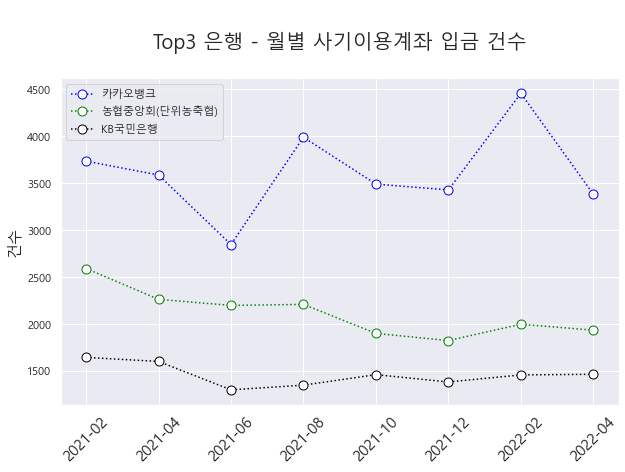

In [76]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(X, Y1, color = 'blue', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '카카오뱅크')
plt.plot(X, Y2, color = 'green', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '농협중앙회(단위농축협)')
plt.plot(X, Y3, color = 'black', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = 'KB국민은행')


# plt.xlabel('월', fontsize = 15, )
plt.ylabel('건수', fontsize = 15)
plt.title('\n Top3 은행 - 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 2)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()

In [77]:
# 인터넷은행(카뱅, 케이, 토스)
X  = list(df_m_bank_name_2.index)
Y1 = list(df_m_bank_name_2['카카오뱅크'])
Y2 = list(df_m_bank_name_2['케이뱅크'])
Y3 = list(df_m_bank_name_2['토스뱅크'])


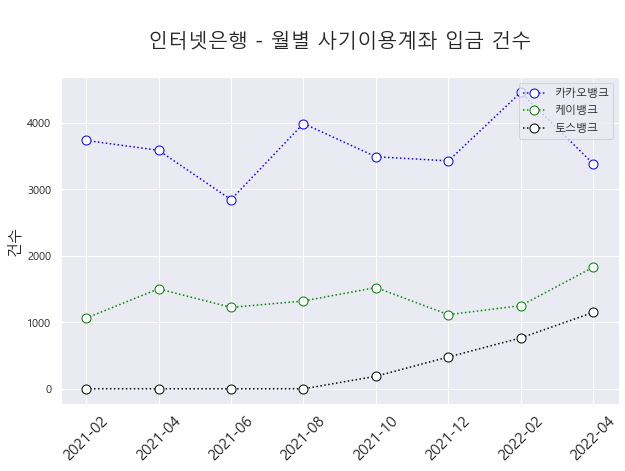

In [78]:
plt.rcParams['figure.figsize'] = (10,6)

plt.plot(X, Y1, color = 'blue', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '카카오뱅크')
plt.plot(X, Y2, color = 'green', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '케이뱅크')
plt.plot(X, Y3, color = 'black', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '토스뱅크')


# plt.xlabel('월', fontsize = 15, )
plt.ylabel('건수', fontsize = 15)
plt.title('\n 인터넷은행 - 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 1)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()

In [79]:
# TOP 3 증권사
X  = list(df_m_bank_name_2.index)
Y1 = list(df_m_bank_name_2['NH투자증권'])
Y2 = list(df_m_bank_name_2['신한금융투자'])
Y3 = list(df_m_bank_name_2['키움증권'])

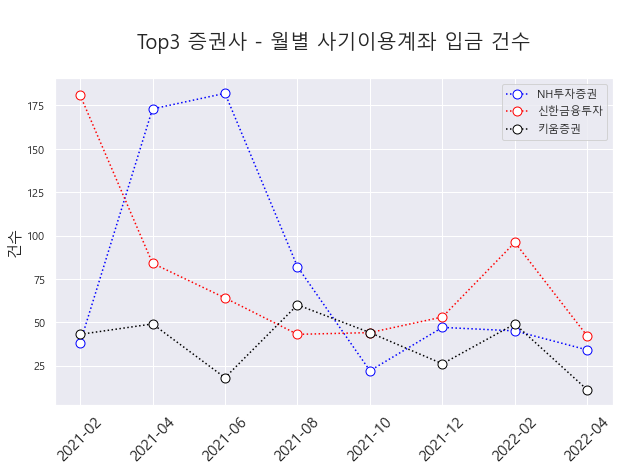

In [80]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(X, Y1, color = 'blue', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = 'NH투자증권')

plt.plot(X, Y2, color = 'red', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '신한금융투자')
plt.plot(X, Y3, color = 'black', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '키움증권')

# plt.xlabel('월', fontsize = 15, )
plt.ylabel('건수', fontsize = 15)
plt.title('\n Top3 증권사 - 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 1)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()

In [81]:
# 지방은행
X  = list(df_m_bank_name_2.index)
Y1 = list(df_m_bank_name_2['부산은행'])
Y2 = list(df_m_bank_name_2['대구은행'])
Y3 = list(df_m_bank_name_2['경남은행'])
Y4 = list(df_m_bank_name_2['광주은행'])
Y5 = list(df_m_bank_name_2['전북은행'])
Y6 = list(df_m_bank_name_2['제주은행'])

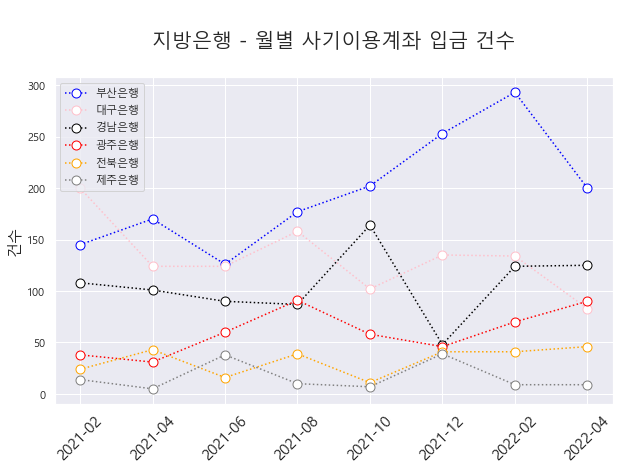

In [82]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(X, Y1, color = 'blue', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '부산은행')
plt.plot(X, Y2, color = 'pink', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '대구은행')
plt.plot(X, Y3, color = 'black', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '경남은행')
plt.plot(X, Y4, color = 'red', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '광주은행')
plt.plot(X, Y5, color = 'orange', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '전북은행')
plt.plot(X, Y6, color = 'gray', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '제주은행')

# plt.xlabel('월', fontsize = 15, )
plt.ylabel('건수', fontsize = 15)
plt.title('\n 지방은행 - 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 2)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()

In [83]:
# 핀테크(페이)
X  = list(df_m_bank_name.index)
Y1 = list(df_m_bank_name['카카오페이'])
Y2 = list(df_m_bank_name['토스'])
Y3 = list(df_m_bank_name['네이버페이'])
Y4 = list(df_m_bank_name['페이코'])


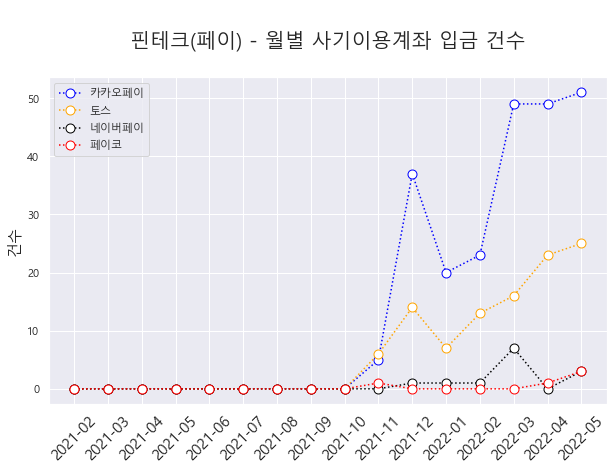

In [84]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(X, Y1, color = 'blue', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '카카오페이')
plt.plot(X, Y2, color = 'orange', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '토스')
plt.plot(X, Y3, color = 'black', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '네이버페이')
plt.plot(X, Y4, color = 'red', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '페이코')


# plt.xlabel('월', fontsize = 15, )
plt.ylabel('건수', fontsize = 15)
plt.title('\n 핀테크(페이) - 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 2)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()

## 연령대별 세부 분석

In [85]:
df_date_ym_old = df_date[['old_n','ym']]
df_date_ym_old

,old_n,ym
0,50대,2021-02
1,50대,2021-02
2,40대,2021-02
3,40대,2021-02
4,40대,2021-02
...,...,...
245273,30대,2022-05
245274,20대,2022-05
245275,20대,2022-05
245276,20대,2022-05


In [86]:
df_date_ym_old['ym'] = df_date_ym_old['ym'].astype(str)

C:\Users\student\AppData\Local\Temp\ipykernel_1116\3090473229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_ym_old['ym'] = df_date_ym_old['ym'].astype(str)


In [87]:
df_m_old = df_date_ym_old.groupby(['ym','old_n']).value_counts().unstack(1)
df_m_old = df_m_old.fillna(0)
df_m_old

old_n,10대,20대,30대,40대,50대,60대,70대,80대,기타
ym,,,,,,,,,
2021-02,975.0,6248.0,4522.0,2969.0,1061.0,334.0,44.0,42.0,5.0
2021-03,742.0,6764.0,5063.0,3139.0,1112.0,303.0,75.0,47.0,7.0
2021-04,794.0,6233.0,4616.0,2949.0,1070.0,311.0,86.0,26.0,7.0
2021-05,880.0,6256.0,4612.0,2859.0,1056.0,299.0,99.0,31.0,6.0
2021-06,848.0,5633.0,4137.0,2415.0,967.0,261.0,56.0,33.0,3.0
2021-07,944.0,6098.0,4490.0,2533.0,999.0,259.0,96.0,21.0,15.0
2021-08,1282.0,6429.0,4359.0,2337.0,932.0,289.0,105.0,13.0,12.0
2021-09,1106.0,5918.0,4176.0,2184.0,903.0,249.0,68.0,18.0,12.0
2021-10,1122.0,6198.0,4355.0,2458.0,925.0,283.0,89.0,11.0,9.0


In [88]:
# 짝수월별
df_m_old_2 = df_m_old.iloc[0::2,:]
df_m_old_2

old_n,10대,20대,30대,40대,50대,60대,70대,80대,기타
ym,,,,,,,,,
2021-02,975.0,6248.0,4522.0,2969.0,1061.0,334.0,44.0,42.0,5.0
2021-04,794.0,6233.0,4616.0,2949.0,1070.0,311.0,86.0,26.0,7.0
2021-06,848.0,5633.0,4137.0,2415.0,967.0,261.0,56.0,33.0,3.0
2021-08,1282.0,6429.0,4359.0,2337.0,932.0,289.0,105.0,13.0,12.0
2021-10,1122.0,6198.0,4355.0,2458.0,925.0,283.0,89.0,11.0,9.0
2021-12,1165.0,5678.0,4568.0,2337.0,893.0,223.0,49.0,10.0,15.0
2022-02,1993.0,7573.0,5045.0,2401.0,821.0,230.0,71.0,16.0,12.0
2022-04,1293.0,6394.0,4593.0,2570.0,846.0,238.0,65.0,34.0,10.0


In [89]:
X  = list(df_m_old_2.index)

Y1 = list(df_m_old_2['10대'])
Y2 = list(df_m_old_2['20대'])
Y3 = list(df_m_old_2['30대'])
Y4 = list(df_m_old_2['40대'])
Y5 = list(df_m_old_2['50대'])
Y6 = list(df_m_old_2['60대'])
Y7 = list(df_m_old_2['70대'])
Y8 = list(df_m_old_2['80대'])
Y9 = list(df_m_old_2['기타'])

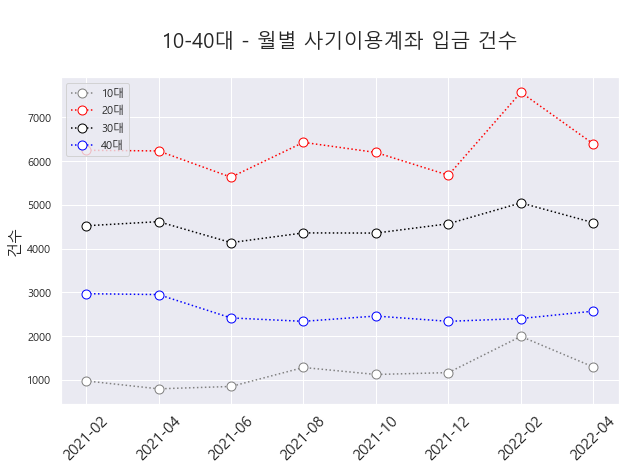

In [90]:
plt.rcParams['figure.figsize'] = (10,6)

plt.plot(X, Y1, color = 'gray', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '10대')

plt.plot(X, Y2, color = 'red', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '20대')
plt.plot(X, Y3, color = 'black', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '30대')
plt.plot(X, Y4, color = 'blue', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '40대')


# plt.xlabel('월', fontsize = 15, )
plt.ylabel('건수', fontsize = 15)
plt.title('\n 10-40대 - 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 2)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()

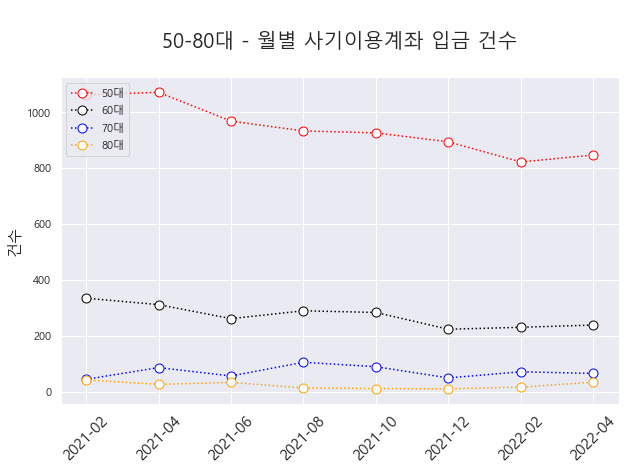

In [91]:
plt.rcParams['figure.figsize'] = (10,6)


plt.plot(X, Y5, color = 'red', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '50대')
plt.plot(X, Y6, color = 'black', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '60대')
plt.plot(X, Y7, color = 'blue', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '70대')
plt.plot(X, Y8, color = 'orange', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '80대')

# plt.xlabel('월', fontsize = 15, )
plt.ylabel('건수', fontsize = 15)
plt.title('\n 50-80대 - 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 2)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()

In [92]:
# 비대면으로만 계좌 개설 가능한 금융사만 추출
df_date_b = df_date[df_date['bank_name'].isin(['카카오뱅크','토스','케이뱅크','토스뱅크'])]

In [93]:
df_date_b_old = df_date_b[['old_n','ym']]
df_date_b_old

,old_n,ym
9,60대,2021-02
13,40대,2021-02
14,30대,2021-02
15,50대,2021-02
16,30대,2021-02
...,...,...
245269,20대,2022-05
245270,20대,2022-05
245271,20대,2022-05
245272,20대,2022-05


In [94]:
df_date_b_old['ym'] = df_date_b_old['ym'].astype(str)

C:\Users\student\AppData\Local\Temp\ipykernel_1116\1692829703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_b_old['ym'] = df_date_b_old['ym'].astype(str)


In [95]:
df_b_old = df_date_b_old.groupby(['ym','old_n']).value_counts().unstack(1)
df_b_old = df_b_old.fillna(0)
df_b_old

old_n,10대,20대,30대,40대,50대,60대,70대,80대,기타
ym,,,,,,,,,
2021-02,297.0,1984.0,1372.0,773.0,252.0,96.0,11.0,7.0,5.0
2021-03,255.0,2216.0,1562.0,902.0,345.0,83.0,23.0,15.0,4.0
2021-04,286.0,2126.0,1408.0,839.0,295.0,87.0,33.0,15.0,2.0
2021-05,301.0,2112.0,1341.0,765.0,326.0,91.0,23.0,8.0,1.0
2021-06,302.0,1684.0,1106.0,641.0,238.0,68.0,16.0,12.0,3.0
2021-07,328.0,1929.0,1304.0,685.0,249.0,71.0,30.0,5.0,7.0
2021-08,499.0,2295.0,1383.0,702.0,299.0,87.0,37.0,4.0,5.0
2021-09,476.0,2097.0,1226.0,594.0,230.0,65.0,24.0,9.0,8.0
2021-10,463.0,2309.0,1341.0,706.0,260.0,87.0,30.0,5.0,1.0


In [96]:
# 짝수월별
df_b_old_2 = df_b_old.iloc[0::2,:]
df_b_old_2

old_n,10대,20대,30대,40대,50대,60대,70대,80대,기타
ym,,,,,,,,,
2021-02,297.0,1984.0,1372.0,773.0,252.0,96.0,11.0,7.0,5.0
2021-04,286.0,2126.0,1408.0,839.0,295.0,87.0,33.0,15.0,2.0
2021-06,302.0,1684.0,1106.0,641.0,238.0,68.0,16.0,12.0,3.0
2021-08,499.0,2295.0,1383.0,702.0,299.0,87.0,37.0,4.0,5.0
2021-10,463.0,2309.0,1341.0,706.0,260.0,87.0,30.0,5.0,1.0
2021-12,497.0,2036.0,1454.0,677.0,292.0,61.0,15.0,3.0,1.0
2022-02,850.0,3049.0,1571.0,664.0,253.0,73.0,18.0,5.0,6.0
2022-04,617.0,2698.0,1649.0,964.0,330.0,82.0,27.0,13.0,5.0


In [97]:
X  = list(df_b_old_2.index)
Y1 = list(df_b_old_2['10대'])
Y2 = list(df_b_old_2['20대'])
Y3 = list(df_b_old_2['30대'])
Y4 = list(df_b_old_2['40대'])
Y5 = list(df_b_old_2['50대'])
Y6 = list(df_b_old_2['60대'])
Y7 = list(df_b_old_2['70대'])
Y8 = list(df_b_old_2['80대'])

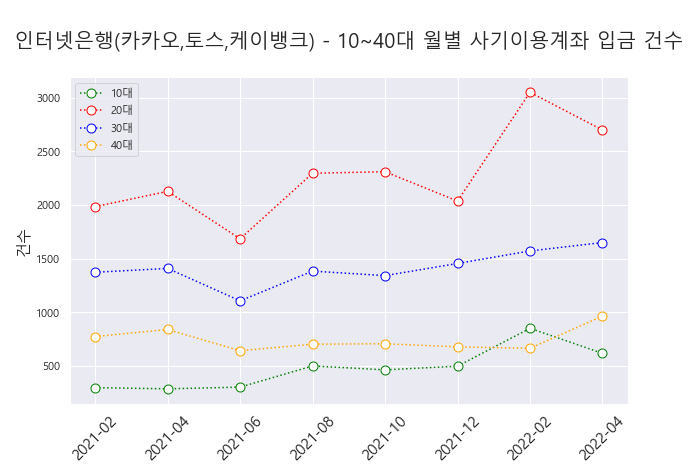

In [98]:
plt.rcParams['figure.figsize'] = (10,6)

plt.plot(X, Y1, color = 'green', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '10대')
plt.plot(X, Y2, color = 'red', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '20대')
plt.plot(X, Y3, color = 'blue', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '30대')
plt.plot(X, Y4, color = 'orange', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '40대')

# plt.xlabel('월', fontsize = 15, )
plt.ylabel('건수', fontsize = 15)
plt.title('\n 인터넷은행(카카오,토스,케이뱅크) - 10~40대 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 2)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()

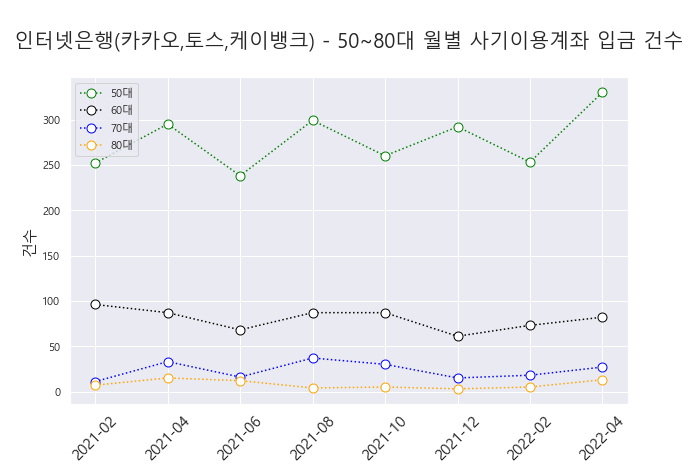

In [99]:
plt.rcParams['figure.figsize'] = (10,6)

plt.plot(X, Y5, color = 'green', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '50대')
plt.plot(X, Y6, color = 'black', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '60대')
plt.plot(X, Y7, color = 'blue', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '70대')
plt.plot(X, Y8, color = 'orange', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '80대')

# plt.xlabel('월', fontsize = 15, )
plt.ylabel('건수', fontsize = 15)
plt.title('\n 인터넷은행(카카오,토스,케이뱅크) - 50~80대 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 2)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()

### 10-30대 사기계좌 입금 건수 상승 추세
### 50대 사기계좌 입금 하락 추세 but, 비대면 사기계좌 입금 건수 증가
### => 인터넷은행, 핀테크 회사 등으로 모르는 사람에게 입금 시, 금융사기와 연관있는 것이 아닌지 충분히 의심해볼것
### 해당 은행들에서는 비대면 계좌 개설 절차 강화 및 금융사기 관련 하여 고객에게 충분한 안내 필요
### 금융당국, 비대면 은행 등에 계좌 개설 절차 강화하도록..!!!

In [100]:
# 지방은행만 추출
df_date_g = df_date[df_date['bank_name'].isin(['부산은행','대구은행','경남은행','광주은행','전북은행','제주은행'])]
df_date_g

,date,no,bank_name,type,old_n,month,year,ym
10,2021-02-15,20222,대구은행,은행,40대,2,2021,2021-02
52,2021-02-25,20264,대구은행,은행,40대,2,2021,2021-02
67,2021-02-09,20279,경남은행,은행,40대,2,2021,2021-02
71,2021-02-13,20283,경남은행,은행,20대,2,2021,2021-02
89,2021-02-24,20301,경남은행,은행,30대,2,2021,2021-02
...,...,...,...,...,...,...,...,...
233332,2022-05-30,266763,대구은행,은행,30대,5,2022,2022-05
233345,2022-05-30,266776,부산은행,은행,40대,5,2022,2022-05
233416,2022-05-31,266847,대구은행,은행,40대,5,2022,2022-05
233454,2022-05-31,266885,광주은행,은행,20대,5,2022,2022-05


In [101]:
df_date_g_old = df_date_g[['old_n','ym']]
df_date_g_old

,old_n,ym
10,40대,2021-02
52,40대,2021-02
67,40대,2021-02
71,20대,2021-02
89,30대,2021-02
...,...,...
233332,30대,2022-05
233345,40대,2022-05
233416,40대,2022-05
233454,20대,2022-05


In [102]:
df_date_g_old['ym'] = df_date_g_old['ym'].astype(str)

C:\Users\student\AppData\Local\Temp\ipykernel_1116\998030563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_g_old['ym'] = df_date_g_old['ym'].astype(str)


In [103]:
df_g_old = df_date_g_old.groupby(['ym','old_n']).value_counts().unstack(1)
df_g_old = df_g_old.fillna(0)
df_g_old

old_n,10대,20대,30대,40대,50대,60대,70대,80대,기타
ym,,,,,,,,,
2021-02,31.0,195.0,159.0,104.0,30.0,9.0,1.0,0.0,0.0
2021-03,34.0,286.0,170.0,90.0,38.0,10.0,3.0,2.0,0.0
2021-04,27.0,189.0,153.0,80.0,22.0,1.0,1.0,1.0,0.0
2021-05,31.0,174.0,145.0,80.0,29.0,7.0,2.0,0.0,1.0
2021-06,30.0,141.0,154.0,86.0,31.0,8.0,3.0,1.0,0.0
2021-07,27.0,187.0,140.0,71.0,33.0,11.0,6.0,0.0,1.0
2021-08,54.0,208.0,176.0,84.0,31.0,8.0,0.0,1.0,0.0
2021-09,25.0,210.0,207.0,123.0,39.0,3.0,1.0,0.0,0.0
2021-10,33.0,203.0,141.0,106.0,48.0,12.0,1.0,0.0,0.0


In [104]:
# 짝수월별
df_g_old_2 = df_g_old.iloc[0::2,:]
df_g_old_2

old_n,10대,20대,30대,40대,50대,60대,70대,80대,기타
ym,,,,,,,,,
2021-02,31.0,195.0,159.0,104.0,30.0,9.0,1.0,0.0,0.0
2021-04,27.0,189.0,153.0,80.0,22.0,1.0,1.0,1.0,0.0
2021-06,30.0,141.0,154.0,86.0,31.0,8.0,3.0,1.0,0.0
2021-08,54.0,208.0,176.0,84.0,31.0,8.0,0.0,1.0,0.0
2021-10,33.0,203.0,141.0,106.0,48.0,12.0,1.0,0.0,0.0
2021-12,33.0,208.0,190.0,99.0,19.0,10.0,2.0,0.0,1.0
2022-02,82.0,239.0,197.0,98.0,51.0,3.0,1.0,0.0,0.0
2022-04,39.0,226.0,163.0,87.0,19.0,14.0,4.0,1.0,0.0


In [105]:
X  = list(df_g_old_2.index)
Y1 = list(df_g_old_2['10대'])
Y2 = list(df_g_old_2['20대'])
Y3 = list(df_g_old_2['30대'])
Y4 = list(df_g_old_2['40대'])
Y5 = list(df_g_old_2['50대'])
Y6 = list(df_g_old_2['60대'])
Y7 = list(df_g_old_2['70대'])
Y8 = list(df_g_old_2['80대'])

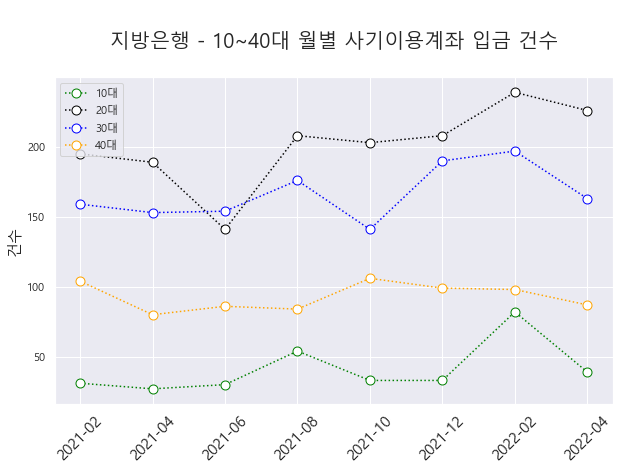

In [106]:
plt.rcParams['figure.figsize'] = (10,6)

plt.plot(X, Y1, color = 'green', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '10대')
plt.plot(X, Y2, color = 'black', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '20대')
plt.plot(X, Y3, color = 'blue', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '30대')
plt.plot(X, Y4, color = 'orange', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '40대')

# plt.xlabel('월', fontsize = 15, )
plt.ylabel('건수', fontsize = 15)
plt.title('\n 지방은행 - 10~40대 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 2)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()

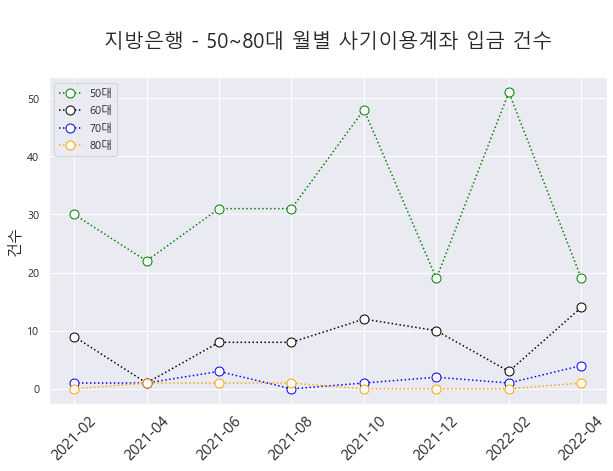

In [107]:
plt.rcParams['figure.figsize'] = (10,6)

plt.plot(X, Y5, color = 'green', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '50대')
plt.plot(X, Y6, color = 'black', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '60대')
plt.plot(X, Y7, color = 'blue', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '70대')
plt.plot(X, Y8, color = 'orange', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '80대')

# plt.xlabel('월', fontsize = 15, )
plt.ylabel('건수', fontsize = 15)
plt.title('\n 지방은행 - 50~80대 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 2)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()

In [108]:
# 증권사만 추출
df_date_j = df_date[df_date['bank_name'].isin(['KB증권', '미래에셋대우', '삼성증권',
       '한국투자증권', 'NH투자증권', '교보증권', '하이투자증권', '현대차증권', '키움증권', '이베스트투자증권',
       'SK증권', '대신증권', '한화투자증권', '신한금융투자', 'DB금융투자', '유진투자증권', '메리츠증권'])]
df_date_j['type'].unique()

array(['증권사'], dtype=object)

In [109]:
df_date_j_old = df_date_j[['old_n','ym']]
df_date_j_old

,old_n,ym
233552,50대,2021-02
233553,40대,2021-02
233554,30대,2021-02
233555,50대,2021-02
233556,40대,2021-02
...,...,...
244907,30대,2022-05
244911,20대,2022-05
244917,40대,2022-05
244918,30대,2022-05


In [110]:
df_date_j_old['ym'] = df_date_j_old['ym'].astype(str)

C:\Users\student\AppData\Local\Temp\ipykernel_1116\1881923913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_j_old['ym'] = df_date_j_old['ym'].astype(str)


In [111]:
df_j_old = df_date_j_old.groupby(['ym','old_n']).value_counts().unstack(1)
df_j_old = df_j_old.fillna(0)
df_j_old

old_n,10대,20대,30대,40대,50대,60대,70대,80대
ym,,,,,,,,
2021-02,5.0,145.0,109.0,90.0,25.0,9.0,1.0,0.0
2021-03,6.0,98.0,114.0,68.0,19.0,5.0,2.0,0.0
2021-04,4.0,219.0,145.0,54.0,38.0,6.0,1.0,0.0
2021-05,29.0,280.0,168.0,61.0,19.0,2.0,1.0,0.0
2021-06,27.0,344.0,141.0,56.0,24.0,2.0,0.0,0.0
2021-07,23.0,245.0,111.0,63.0,35.0,5.0,1.0,0.0
2021-08,24.0,143.0,101.0,32.0,13.0,6.0,0.0,0.0
2021-09,9.0,88.0,65.0,43.0,9.0,1.0,1.0,0.0
2021-10,9.0,97.0,74.0,48.0,11.0,2.0,0.0,1.0


In [112]:
# 짝수월별
df_j_old_2 = df_j_old.iloc[0::2,:]
df_j_old_2

old_n,10대,20대,30대,40대,50대,60대,70대,80대
ym,,,,,,,,
2021-02,5.0,145.0,109.0,90.0,25.0,9.0,1.0,0.0
2021-04,4.0,219.0,145.0,54.0,38.0,6.0,1.0,0.0
2021-06,27.0,344.0,141.0,56.0,24.0,2.0,0.0,0.0
2021-08,24.0,143.0,101.0,32.0,13.0,6.0,0.0,0.0
2021-10,9.0,97.0,74.0,48.0,11.0,2.0,0.0,1.0
2021-12,13.0,96.0,80.0,53.0,18.0,0.0,0.0,0.0
2022-02,25.0,134.0,97.0,54.0,7.0,2.0,0.0,1.0
2022-04,15.0,82.0,87.0,48.0,17.0,1.0,1.0,0.0


In [113]:
X  = list(df_j_old_2.index)
Y1 = list(df_j_old_2['10대'])
Y2 = list(df_j_old_2['20대'])
Y3 = list(df_j_old_2['30대'])
Y4 = list(df_j_old_2['40대'])
Y5 = list(df_j_old_2['50대'])
Y6 = list(df_j_old_2['60대'])
Y7 = list(df_j_old_2['70대'])
Y8 = list(df_j_old_2['80대'])

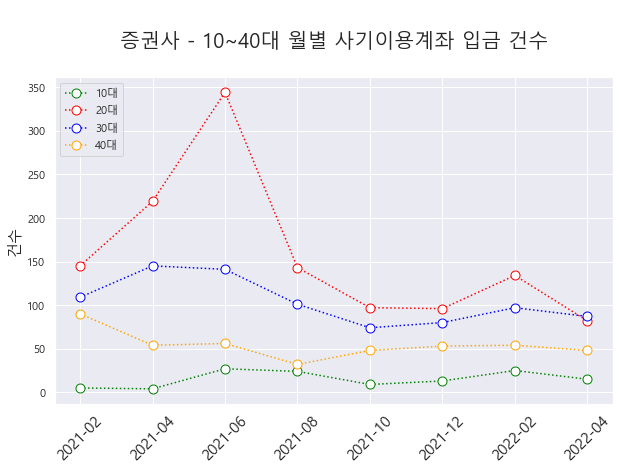

In [114]:
plt.rcParams['figure.figsize'] = (10,6)

plt.plot(X, Y1, color = 'green', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '10대')
plt.plot(X, Y2, color = 'red', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '20대')
plt.plot(X, Y3, color = 'blue', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '30대')
plt.plot(X, Y4, color = 'orange', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '40대')

# plt.xlabel('월', fontsize = 15, )
plt.ylabel('건수', fontsize = 15)
plt.title('\n 증권사 - 10~40대 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 2)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()

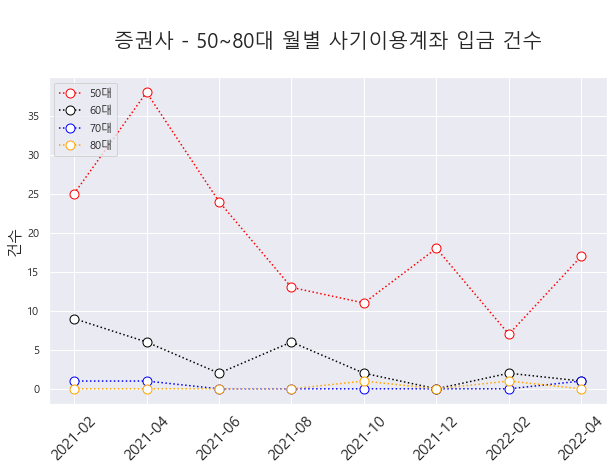

In [115]:
plt.rcParams['figure.figsize'] = (10,6)

plt.plot(X, Y5, color = 'red', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '50대')
plt.plot(X, Y6, color = 'black', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '60대')
plt.plot(X, Y7, color = 'blue', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '70대')
plt.plot(X, Y8, color = 'orange', linestyle = ':', marker = 'o', markerfacecolor = 'white',
        markersize = 9, label = '80대')

# plt.xlabel('월', fontsize = 15, )
plt.ylabel('건수', fontsize = 15)
plt.title('\n 증권사 - 50~80대 월별 사기이용계좌 입금 건수 \n', fontsize = 20)
plt.legend(loc = 2)
plt.xticks(fontsize = 15, rotation = 45)
plt.show()